In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📊 Exploration et Analyse des Données H&M

**Objectifs :**
- Analyser la structure et qualité des données
- Calculer la sparsité du dataset
- Identifier les patterns d'interactions
- Analyser les distributions utilisateurs/articles
- Étudier les tendances temporelles et démographiques


## 📁 CHARGEMENT DES DONNÉES


📊 Chargement des données depuis le notebook précédent...
✅ Données chargées - 31,788,324 transactions

🔍 ANALYSE DE LA SPARSITÉ DU DATASET
👥 Utilisateurs uniques    :  1,362,281
🎽 Articles uniques        :    104,547
🛒 Interactions totales    : 31,788,324
📊 Interactions possibles  : 142,422,391,707
🕳️  Sparsité               : 99.9777%
📈 Densité                 : 0.0223%


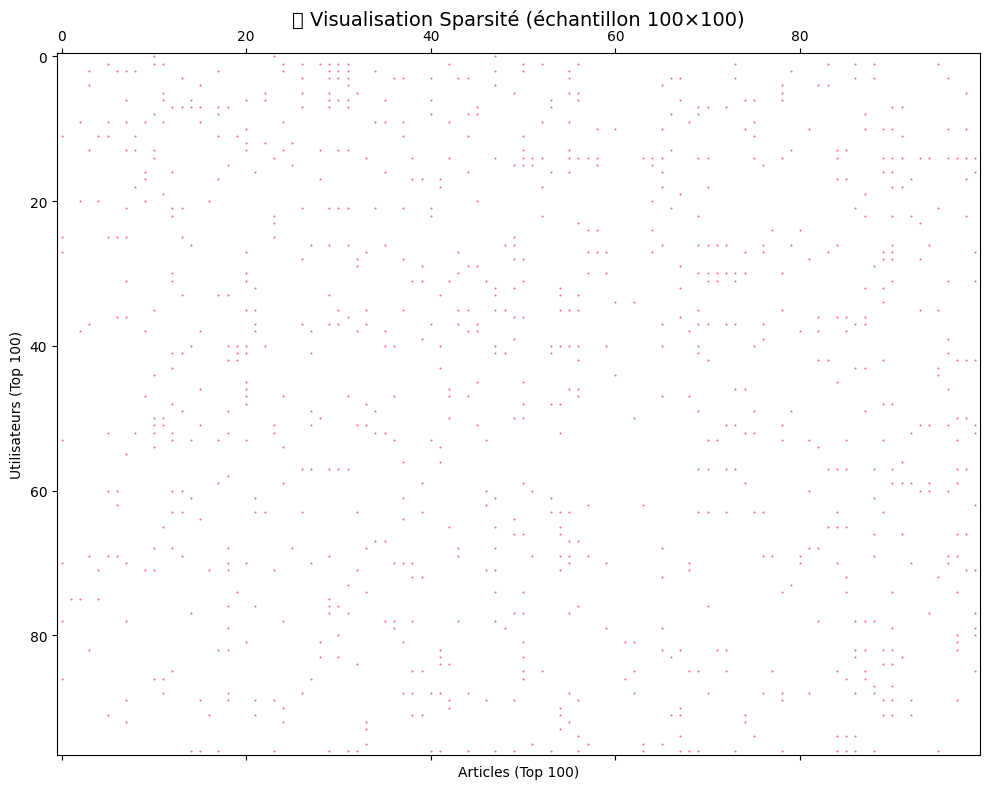

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("📊 Chargement des données depuis le notebook précédent...")

BASE_PATH = "/content/drive/MyDrive/PSL/00-RecommanderSystem/h2m-recsys"
OUTPUTS_PATH = f"{BASE_PATH}/outputs"

with open(f"{OUTPUTS_PATH}/datasets_complets.pkl", "rb") as f:
    data = pickle.load(f)

df_articles = data['articles']
df_customers = data['customers']
df_transactions = data['transactions']
metadata = data['metadata']

print(f"✅ Données chargées - {metadata['n_transactions']:,} transactions")

# ===============================================================================
# 🔍 ANALYSE DE LA SPARSITÉ
# ===============================================================================

print("\n" + "="*60)
print("🔍 ANALYSE DE LA SPARSITÉ DU DATASET")
print("="*60)

n_users = df_transactions['customer_id'].nunique()
n_items = df_transactions['article_id'].nunique()
n_interactions = len(df_transactions)

total_possible = n_users * n_items
sparsity = 1 - (n_interactions / total_possible)

print(f"👥 Utilisateurs uniques    : {n_users:>10,}")
print(f"🎽 Articles uniques        : {n_items:>10,}")
print(f"🛒 Interactions totales    : {n_interactions:>10,}")
print(f"📊 Interactions possibles  : {total_possible:>10,}")
print(f"🕳️  Sparsité               : {sparsity:.4%}")
print(f"📈 Densité                 : {(1-sparsity):.4%}")

# Visualisation sparsité (échantillon)
sample_users = df_transactions['customer_id'].value_counts().head(100).index
sample_items = df_transactions['article_id'].value_counts().head(100).index

sample_df = df_transactions[
    (df_transactions['customer_id'].isin(sample_users)) &
    (df_transactions['article_id'].isin(sample_items))
]

interaction_matrix = pd.crosstab(sample_df['customer_id'], sample_df['article_id'])

plt.figure(figsize=(10, 8))
plt.spy(interaction_matrix, markersize=0.5, aspect='auto')
plt.title('🕳️ Visualisation Sparsité (échantillon 100×100)', fontsize=14, pad=20)
plt.xlabel('Articles (Top 100)')
plt.ylabel('Utilisateurs (Top 100)')
plt.tight_layout()
plt.savefig(f"{OUTPUTS_PATH}/figures/sparsity_visualization.png", dpi=300, bbox_inches='tight')
plt.show()

## 📈 DISTRIBUTIONS DES INTERACTIONS


📈 ANALYSE DES DISTRIBUTIONS

👥 INTERACTIONS PAR UTILISATEUR:
   • Moyenne    : 23.33
   • Médiane    : 9
   • Écart-type : 39.24
   • Min/Max    : 1 / 1895

🎽 INTERACTIONS PAR ARTICLE:
   • Moyenne    : 304.06
   • Médiane    : 65
   • Écart-type : 791.27
   • Min/Max    : 1 / 50287


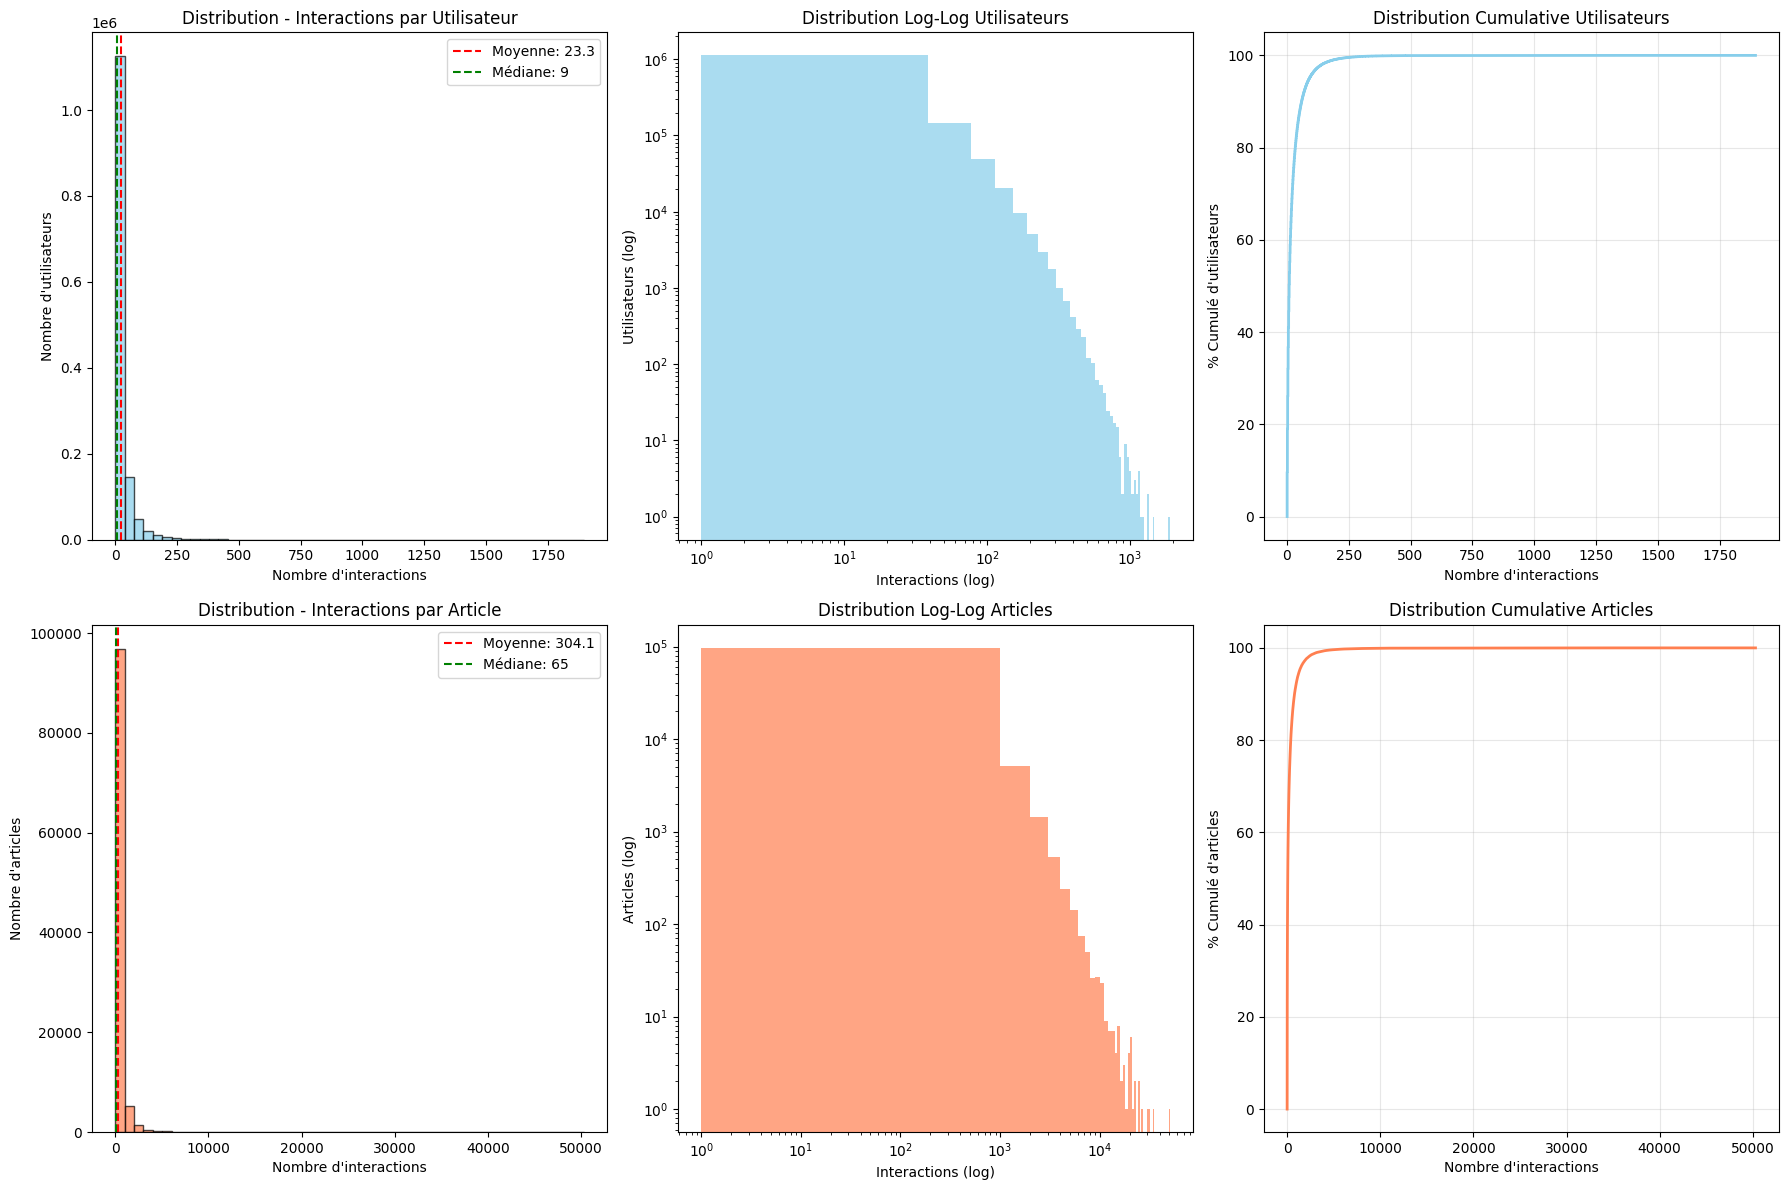

In [ ]:


print("\n" + "="*60)
print("📈 ANALYSE DES DISTRIBUTIONS")
print("="*60)

# Interactions par utilisateur
user_interactions = df_transactions.groupby('customer_id').size()
item_interactions = df_transactions.groupby('article_id').size()

print("\n👥 INTERACTIONS PAR UTILISATEUR:")
print(f"   • Moyenne    : {user_interactions.mean():.2f}")
print(f"   • Médiane    : {user_interactions.median():.0f}")
print(f"   • Écart-type : {user_interactions.std():.2f}")
print(f"   • Min/Max    : {user_interactions.min()} / {user_interactions.max()}")

print("\n🎽 INTERACTIONS PAR ARTICLE:")
print(f"   • Moyenne    : {item_interactions.mean():.2f}")
print(f"   • Médiane    : {item_interactions.median():.0f}")
print(f"   • Écart-type : {item_interactions.std():.2f}")
print(f"   • Min/Max    : {item_interactions.min()} / {item_interactions.max()}")

# Visualisations distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Utilisateurs
axes[0, 0].hist(user_interactions, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(user_interactions.mean(), color='red', linestyle='--', label=f'Moyenne: {user_interactions.mean():.1f}')
axes[0, 0].axvline(user_interactions.median(), color='green', linestyle='--', label=f'Médiane: {user_interactions.median():.0f}')
axes[0, 0].set_title('Distribution - Interactions par Utilisateur')
axes[0, 0].set_xlabel('Nombre d\'interactions')
axes[0, 0].set_ylabel('Nombre d\'utilisateurs')
axes[0, 0].legend()

axes[0, 1].hist(user_interactions, bins=50, alpha=0.7, color='skyblue')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Distribution Log-Log Utilisateurs')
axes[0, 1].set_xlabel('Interactions (log)')
axes[0, 1].set_ylabel('Utilisateurs (log)')

user_sorted = user_interactions.sort_values()
cumulative = np.arange(1, len(user_sorted) + 1) / len(user_sorted) * 100
axes[0, 2].plot(user_sorted.values, cumulative, color='skyblue', linewidth=2)
axes[0, 2].set_title('Distribution Cumulative Utilisateurs')
axes[0, 2].set_xlabel('Nombre d\'interactions')
axes[0, 2].set_ylabel('% Cumulé d\'utilisateurs')
axes[0, 2].grid(True, alpha=0.3)

# Articles
axes[1, 0].hist(item_interactions, bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[1, 0].axvline(item_interactions.mean(), color='red', linestyle='--', label=f'Moyenne: {item_interactions.mean():.1f}')
axes[1, 0].axvline(item_interactions.median(), color='green', linestyle='--', label=f'Médiane: {item_interactions.median():.0f}')
axes[1, 0].set_title('Distribution - Interactions par Article')
axes[1, 0].set_xlabel('Nombre d\'interactions')
axes[1, 0].set_ylabel('Nombre d\'articles')
axes[1, 0].legend()

axes[1, 1].hist(item_interactions, bins=50, alpha=0.7, color='coral')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Distribution Log-Log Articles')
axes[1, 1].set_xlabel('Interactions (log)')
axes[1, 1].set_ylabel('Articles (log)')

item_sorted = item_interactions.sort_values()
cumulative = np.arange(1, len(item_sorted) + 1) / len(item_sorted) * 100
axes[1, 2].plot(item_sorted.values, cumulative, color='coral', linewidth=2)
axes[1, 2].set_title('Distribution Cumulative Articles')
axes[1, 2].set_xlabel('Nombre d\'interactions')
axes[1, 2].set_ylabel('% Cumulé d\'articles')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f"{OUTPUTS_PATH}/figures/interactions_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

## 🎯 ANALYSE "LONG TAIL"


🎯 ANALYSE DU PHÉNOMÈNE LONG TAIL
👥 30.8% des utilisateurs génèrent 80% des interactions
🎽 20.7% des articles génèrent 80% des interactions
📊 Top 10% utilisateurs: 48.5% des interactions
📊 Top 10% articles: 60.7% des interactions


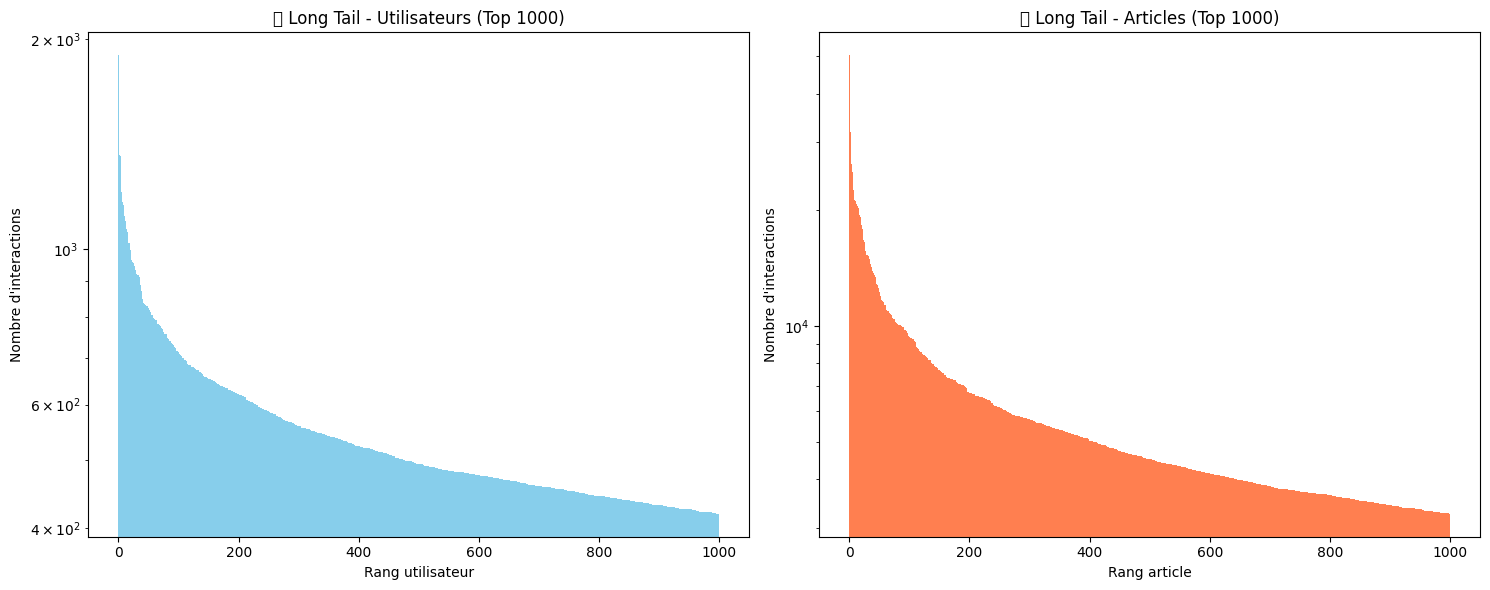

In [ ]:
print("\n" + "="*60)
print("🎯 ANALYSE DU PHÉNOMÈNE LONG TAIL")
print("="*60)

# Pour utilisateurs
user_sorted_desc = user_interactions.sort_values(ascending=False)
user_cumsum = user_sorted_desc.cumsum()
total_interactions_user = user_cumsum.iloc[-1]

users_80_percent = (user_cumsum <= 0.8 * total_interactions_user).sum()
percent_users_80 = (users_80_percent / len(user_interactions)) * 100

# Pour articles
item_sorted_desc = item_interactions.sort_values(ascending=False)
item_cumsum = item_sorted_desc.cumsum()
total_interactions_item = item_cumsum.iloc[-1]

items_80_percent = (item_cumsum <= 0.8 * total_interactions_item).sum()
percent_items_80 = (items_80_percent / len(item_interactions)) * 100

print(f"👥 {percent_users_80:.1f}% des utilisateurs génèrent 80% des interactions")
print(f"🎽 {percent_items_80:.1f}% des articles génèrent 80% des interactions")
print(f"📊 Top 10% utilisateurs: {(user_sorted_desc.head(int(0.1*len(user_interactions))).sum()/total_interactions_user)*100:.1f}% des interactions")
print(f"📊 Top 10% articles: {(item_sorted_desc.head(int(0.1*len(item_interactions))).sum()/total_interactions_item)*100:.1f}% des interactions")

# Visualisation Long Tail
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

n_users_plot = min(1000, len(user_interactions))
ax1.bar(range(n_users_plot), user_sorted_desc.head(n_users_plot).values, width=1.0, color='skyblue')
ax1.set_xlabel('Rang utilisateur')
ax1.set_ylabel('Nombre d\'interactions')
ax1.set_title(f'🎯 Long Tail - Utilisateurs (Top {n_users_plot})')
ax1.set_yscale('log')

n_items_plot = min(1000, len(item_interactions))
ax2.bar(range(n_items_plot), item_sorted_desc.head(n_items_plot).values, width=1.0, color='coral')
ax2.set_xlabel('Rang article')
ax2.set_ylabel('Nombre d\'interactions')
ax2.set_title(f'🎯 Long Tail - Articles (Top {n_items_plot})')
ax2.set_yscale('log')

plt.tight_layout()
plt.savefig(f"{OUTPUTS_PATH}/figures/long_tail_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

## ⏰ ANALYSE TEMPORELLE


⏰ ANALYSE TEMPORELLE
📅 Période: 2018-09-20 00:00:00 → 2020-09-22 00:00:00
⏳ Durée: 733 jours


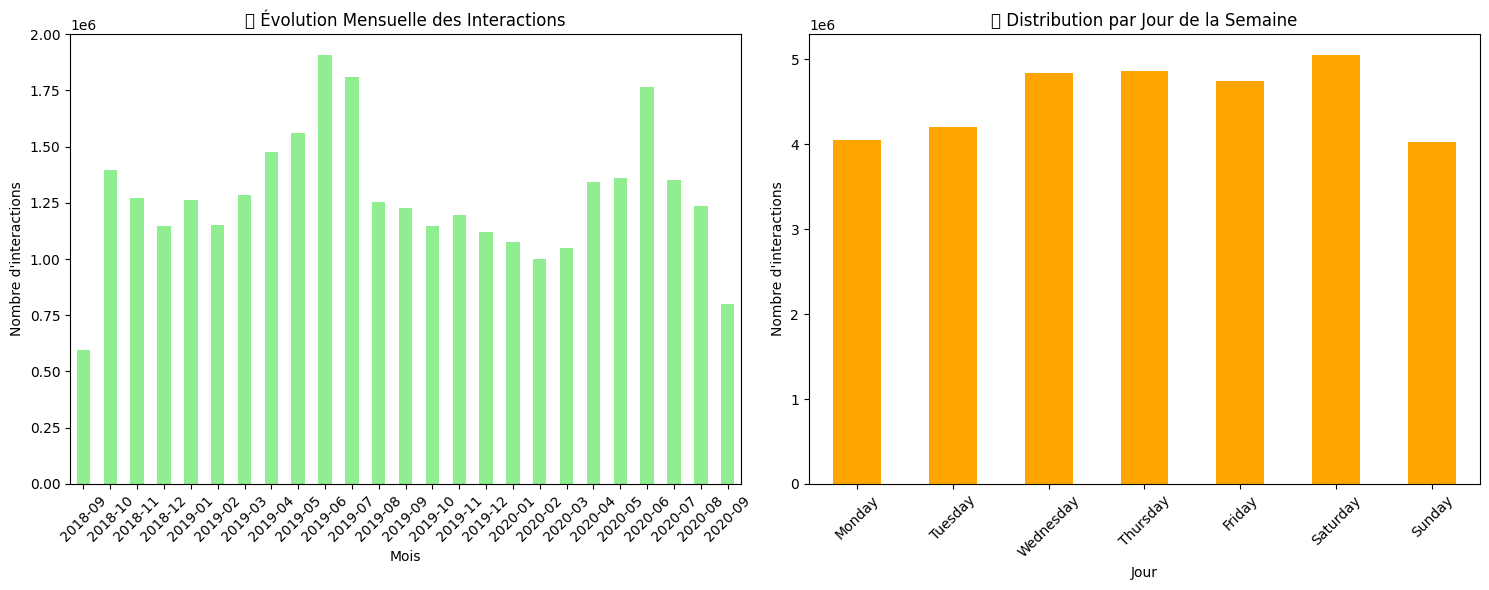

In [ ]:

print("\n" + "="*60)
print("⏰ ANALYSE TEMPORELLE")
print("="*60)

df_transactions['t_dat'] = pd.to_datetime(df_transactions['t_dat'])

print(f"📅 Période: {df_transactions['t_dat'].min()} → {df_transactions['t_dat'].max()}")
print(f"⏳ Durée: {(df_transactions['t_dat'].max() - df_transactions['t_dat'].min()).days} jours")

# Évolution mensuelle
df_transactions['year_month'] = df_transactions['t_dat'].dt.to_period('M')
monthly_interactions = df_transactions.groupby('year_month').size()

# Jours de la semaine
df_transactions['day_of_week'] = df_transactions['t_dat'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_interactions = df_transactions['day_of_week'].value_counts().reindex(day_order)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

monthly_interactions.plot(kind='bar', ax=ax1, color='lightgreen')
ax1.set_title('📈 Évolution Mensuelle des Interactions')
ax1.set_xlabel('Mois')
ax1.set_ylabel('Nombre d\'interactions')
ax1.tick_params(axis='x', rotation=45)

daily_interactions.plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('📊 Distribution par Jour de la Semaine')
ax2.set_xlabel('Jour')
ax2.set_ylabel('Nombre d\'interactions')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(f"{OUTPUTS_PATH}/figures/temporal_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

## 👥 ANALYSE DÉMOGRAPHIQUE


👥 ANALYSE DÉMOGRAPHIQUE
📊 Analyse par groupe d'âge:
           n_clients  n_transactions  prix_moyen
age_group                                       
<20           125150         1472153        0.02
20-24         283359         6633624        0.03
25-29         225704         6827502        0.03
30-34         130379         3683018        0.03
35-39          79344         1946181        0.03
40-49         215485         5215137        0.03
50-59         208544         4680033        0.03
60+            78555         1190418        0.03


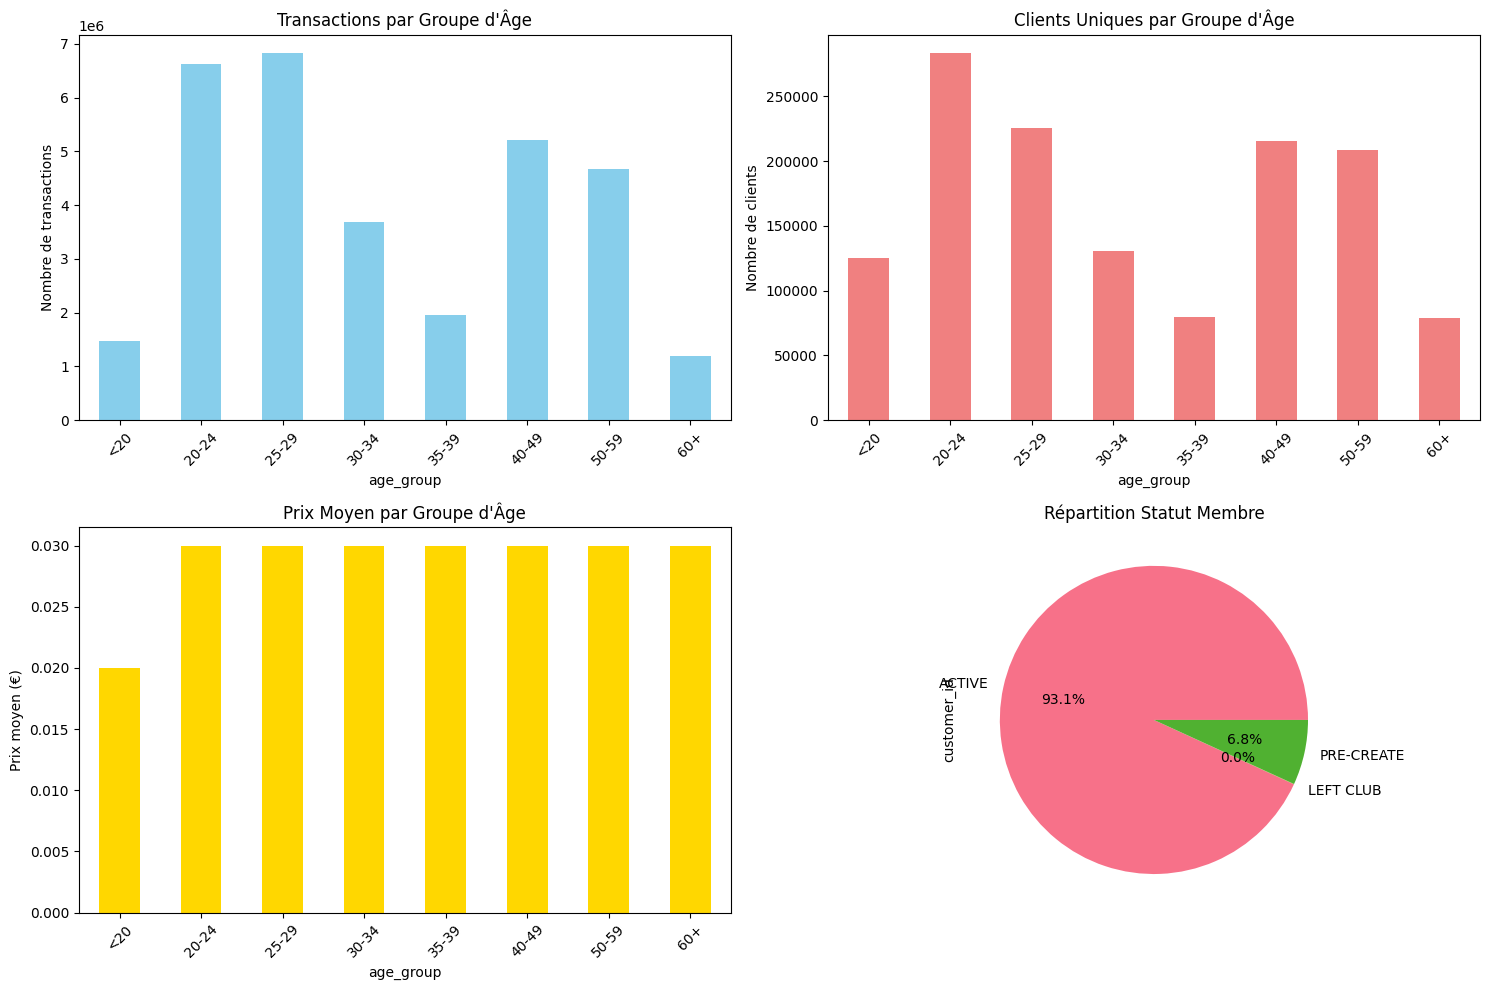

In [ ]:

print("\n" + "="*60)
print("👥 ANALYSE DÉMOGRAPHIQUE")
print("="*60)

# Jointure avec données clients
df_demo = df_transactions.merge(
    df_customers[['customer_id', 'age', 'club_member_status', 'fashion_news_frequency']],
    on='customer_id', how='left'
)

# Groupes d'âge
df_demo['age_group'] = pd.cut(
    df_demo['age'],
    bins=[0, 20, 25, 30, 35, 40, 50, 60, 100],
    labels=['<20', '20-24', '25-29', '30-34', '35-39', '40-49', '50-59', '60+']
)

age_stats = df_demo.groupby('age_group').agg({
    'customer_id': 'nunique',
    'article_id': 'count',
    'price': 'mean'
}).round(2)

age_stats.columns = ['n_clients', 'n_transactions', 'prix_moyen']

print("📊 Analyse par groupe d'âge:")
print(age_stats)

# Visualisation démographique
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

age_stats['n_transactions'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Transactions par Groupe d\'Âge')
axes[0,0].set_ylabel('Nombre de transactions')

age_stats['n_clients'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Clients Uniques par Groupe d\'Âge')
axes[0,1].set_ylabel('Nombre de clients')

age_stats['prix_moyen'].plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Prix Moyen par Groupe d\'Âge')
axes[1,0].set_ylabel('Prix moyen (€)')

member_stats = df_demo.groupby('club_member_status')['customer_id'].nunique()
member_stats.plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Répartition Statut Membre')

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(f"{OUTPUTS_PATH}/figures/demographic_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

## 💾 SAUVEGARDE DES RÉSULTATS

In [ ]:
print("\n💾 Sauvegarde des résultats d'exploration...")

exploration_results = {
    'stats_base': {
        'n_users': n_users,
        'n_items': n_items,
        'n_interactions': n_interactions,
        'sparsity': sparsity
    },
    'distributions': {
        'user_interactions': user_interactions,
        'item_interactions': item_interactions
    },
    'long_tail': {
        'percent_users_80': percent_users_80,
        'percent_items_80': percent_items_80
    },
    'temporal': {
        'monthly_interactions': monthly_interactions,
        'daily_interactions': daily_interactions
    },
    'demographic': age_stats,
    'insights': [
        f"Sparsité élevée: {sparsity:.2%}",
        f"{percent_users_80:.1f}% utilisateurs → 80% interactions",
        f"{percent_items_80:.1f}% articles → 80% interactions",
        "Distribution long tail prononcée",
        "Patterns temporels identifiés"
    ]
}

with open(f"{OUTPUTS_PATH}/exploration_results.pkl", "wb") as f:
    pickle.dump(exploration_results, f)

print(f"✅ Résultats sauvés: {OUTPUTS_PATH}/exploration_results.pkl")


💾 Sauvegarde des résultats d'exploration...
✅ Résultats sauvés: /content/drive/MyDrive/PSL/00-RecommanderSystem/h2m-recsys/outputs/exploration_results.pkl


## 📋 INSIGHTS ET RECOMMANDATIONS

In [ ]:

print("\n" + "="*70)
print("🎯 INSIGHTS CLÉS ET RECOMMANDATIONS")
print("="*70)

print(f"\n📊 CARACTÉRISTIQUES DU DATASET:")
print(f"   • Sparsité extrême ({sparsity:.2%}) → Sampling stratégique nécessaire")
print(f"   • {n_users:,} clients, {n_items:,} articles → Dimensionnalité gérable")
print(f"   • Distribution long tail prononcée → Focus utilisateurs actifs")

print(f"\n🎯 RECOMMANDATIONS POUR LE SAMPLING:")
print(f"   • Utilisateurs actifs (≥5 interactions): {(user_interactions >= 5).sum():,} clients")
print(f"   • Articles populaires (≥10 interactions): {(item_interactions >= 10).sum():,} articles")
print(f"   • Période récente recommandée pour split temporel")

print(f"\n🚀 STRATÉGIE MODÉLISATION:")
print(f"   • LightFM avec loss='warp' (données implicites)")
print(f"   • Features articles cruciales (cold start)")
print(f"   • Évaluation sur utilisateurs actifs")

print("\n✅ Exploration terminée - Prêt pour l'échantillonnage!")
print("="*70)


🎯 INSIGHTS CLÉS ET RECOMMANDATIONS

📊 CARACTÉRISTIQUES DU DATASET:
   • Sparsité extrême (99.98%) → Sampling stratégique nécessaire
   • 1,362,281 clients, 104,547 articles → Dimensionnalité gérable
   • Distribution long tail prononcée → Focus utilisateurs actifs

🎯 RECOMMANDATIONS POUR LE SAMPLING:
   • Utilisateurs actifs (≥5 interactions): 925,558 clients
   • Articles populaires (≥10 interactions): 83,319 articles
   • Période récente recommandée pour split temporel

🚀 STRATÉGIE MODÉLISATION:
   • LightFM avec loss='warp' (données implicites)
   • Features articles cruciales (cold start)
   • Évaluation sur utilisateurs actifs

✅ Exploration terminée - Prêt pour l'échantillonnage!
